# Restarting the MCMC

Sometimes the number of iterations is not enough to reach the convergence of the chains or simply the needed wall clock time is prohibitive so we need to separate in multiple runs. We would like to restart the mcmc beginning from the last state of the chains from a previous mcmc run. 

For this example let's restart the mcmc from the example customized_fit. In that case the output file was Custom_hdf5_mcmc.hdf5 located at ./outputs/. We will also see how to use the joined results to make graphics.

In [1]:
import nauyaca as nau

import numpy as np
import matplotlib.pyplot as plt

Let's load the Planetary System object saved in the 'two_planets_fit' example

In [2]:
system = nau.PlanetarySystem.load_json('./outputs/System-X.json')
print(system)

--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

 =========== Planetary System Summary =========== 
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

System: System-X
Mstar: 1.28 Msun |  Rstar: 1.98 Rsun
Number of planets: 2
Planet information:
------
Planet1: Planet-b
  Boundaries:
    mass: (1, 100)  [M_earth]
    period: (22.95, 22.96)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (85, 95)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (89, 89)  [deg]
  TTVs: True
------
Planet2: Planet-c
  Boundaries:
    mass: (1, 100)  [M_earth]
    period: (42.86, 42.87)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90.3, 90.3)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (0.0, 180)  [deg]
  T

### Restarting from previous run

Here we restart the mcmc using a new number of iterations (itmax) and saving at defined number of steps (intra_steps). Using the same intra_steps value of the previous run is strongly suggested to have consistent results. We specify that the temperature ladder continue as before (False), otherwise the temperature ladder will be restarted. Try these two options and see the differences. 

In [3]:
hdf5_before = 'outputs/Custom_hdf5_mcmc.hdf5'

previous = nau.utils.get_mcmc_results(hdf5_before, keywords=['INTRA_STEPS'])
print(previous)

{'INTRA_STEPS': array([100])}


Let's create an instance of the MCMC class with the parameters from the last run,

In [4]:
mcmc = nau.MCMC.restart_mcmc(system, 
                hdf5_file=hdf5_before, 
                cores=8, 
                itmax=20000, 
                intra_steps=previous['INTRA_STEPS'][0], 
                restart_ladder=True
                )


 =========== RESTARTING MCMC ===========

--> Restarting from file:  ./outputs/Custom_hdf5_mcmc.hdf5
--> Temperature ladder status:  Restarting temperature ladder



Since in our previous run we used a customized prior function, we need to provide the function again:

In [5]:
# A dictionary to call the index of the planetary parameters:
params = system.params_names.split()
params_dict = dict(zip(params, range(len(params)) ))

# A dictionary with the mean and standard deviations assumed for the priors
gaussian_parameters={'mass1': [40,3],
                     'mass2': [80,3],
                     'inclination1': [90,1],
                     'ascending_node2': [90,5]}

def normal_logp(mean,std,param):
    
    logp = -0.5*np.log(2*np.pi*std**2) - 0.5*((param - mean)/std)**2
    
    return logp
    
def my_log_priors(x, psystem):
    """x is an array with the planetary proposals.
    psystem is the Planetary System object, if needed"""
    
    logprior = 0
    for k, v in gaussian_parameters.items():
        mean, std = v
        param = x[params_dict[k]]
        
        logprior +=  normal_logp(mean, std, param)
        
    return logprior

In [6]:
# Pass the log-prior function to nauyaca
mcmc.logprior = my_log_priors

And now, run the simulations as usual,

In [7]:
sampler = mcmc.run()


 =========== PARALLEL-TEMPERING MCMC ===========

--> Starting date:  2021-08-17 16:41
--> Reference epoch of the solutions:  0  [JD]
--> Results will be saved at:  ./outputs/Custom_hdf5_mcmc_2.hdf5
--> MCMC parameters:
      -ntemps: 12
      -nwalkers: 40
      -itmax: 10000
      -intra_steps: 100

--------- Iteration:  100
 Mean tau Temp 0: 0.753
 Accepted swap fraction in Temp 0:  0.103
 Mean acceptance fraction Temp 0:  0.126
 Mean log-likelihood:  172.693
 Mean log-posterior:   152.882
 Current log-posterior dispersion:  124.349
 Current MAP:  (0, 3) 236.569
 Saving time: 0.00939 sec
 Elapsed time:  0.174 min
--------- Iteration:  200
 Mean tau Temp 0: 1.5
 Accepted swap fraction in Temp 0:  0.087
 Mean acceptance fraction Temp 0:  0.123
 Mean log-likelihood:  173.307
 Mean log-posterior:   153.441
 Current log-posterior dispersion:  124.41
 Current MAP:  (0, 9) 237.117
 Saving time: 0.00951 sec
 Elapsed time:  0.3457 min
--------- Iteration:  300
 Mean tau Temp 0: 2.242
 Accep

--------- Iteration:  2600
 Mean tau Temp 0: 17.376
 Accepted swap fraction in Temp 0:  0.025
 Mean acceptance fraction Temp 0:  0.116
 Mean log-likelihood:  177.606
 Mean log-posterior:   157.687
 Current log-posterior dispersion:  117.11
 Current MAP:  (0, 29) 237.34
 Saving time: 0.01122 sec
 Elapsed time:  5.3143 min
--------- Iteration:  2700
 Mean tau Temp 0: 17.922
 Accepted swap fraction in Temp 0:  0.024
 Mean acceptance fraction Temp 0:  0.116
 Mean log-likelihood:  177.293
 Mean log-posterior:   157.399
 Current log-posterior dispersion:  116.725
 Current MAP:  (0, 6) 236.068
 Saving time: 0.00904 sec
 Elapsed time:  5.5397 min
--------- Iteration:  2800
 Mean tau Temp 0: 18.456
 Accepted swap fraction in Temp 0:  0.024
 Mean acceptance fraction Temp 0:  0.116
 Mean log-likelihood:  178.12
 Mean log-posterior:   158.194
 Current log-posterior dispersion:  116.93
 Current MAP:  (0, 1) 236.875
 Saving time: 0.01467 sec
 Elapsed time:  5.7449 min
--------- Iteration:  2900
 Mea

--------- Iteration:  5200
 Mean tau Temp 0: 25.386
 Accepted swap fraction in Temp 0:  0.018
 Mean acceptance fraction Temp 0:  0.116
 Mean log-likelihood:  180.219
 Mean log-posterior:   159.053
 Current log-posterior dispersion:  114.685
 Current MAP:  (0, 21) 237.155
 Saving time: 0.01337 sec
 Elapsed time:  11.1371 min
--------- Iteration:  5300
 Mean tau Temp 0: 25.279
 Accepted swap fraction in Temp 0:  0.017
 Mean acceptance fraction Temp 0:  0.116
 Mean log-likelihood:  180.649
 Mean log-posterior:   159.202
 Current log-posterior dispersion:  114.914
 Current MAP:  (0, 21) 237.027
 Saving time: 0.01539 sec
 Elapsed time:  11.3886 min
--------- Iteration:  5400
 Mean tau Temp 0: 25.141
 Accepted swap fraction in Temp 0:  0.017
 Mean acceptance fraction Temp 0:  0.116
 Mean log-likelihood:  181.129
 Mean log-posterior:   159.562
 Current log-posterior dispersion:  114.029
 Current MAP:  (0, 28) 237.427
 Saving time: 0.01301 sec
 Elapsed time:  11.6089 min
--------- Iteration:  

--------- Iteration:  7800
 Mean tau Temp 0: 15.215
 Accepted swap fraction in Temp 0:  0.017
 Mean acceptance fraction Temp 0:  0.115
 Mean log-likelihood:  186.806
 Mean log-posterior:   172.893
 Current log-posterior dispersion:  91.619
 Current MAP:  (0, 7) 236.476
 Saving time: 0.01463 sec
 Elapsed time:  17.038 min
--------- Iteration:  7900
 Mean tau Temp 0: 14.618
 Accepted swap fraction in Temp 0:  0.018
 Mean acceptance fraction Temp 0:  0.115
 Mean log-likelihood:  186.734
 Mean log-posterior:   173.414
 Current log-posterior dispersion:  89.574
 Current MAP:  (0, 10) 237.219
 Saving time: 0.01404 sec
 Elapsed time:  17.2976 min
--------- Iteration:  8000
 Mean tau Temp 0: 14.014
 Accepted swap fraction in Temp 0:  0.018
 Mean acceptance fraction Temp 0:  0.115
 Mean log-likelihood:  188.057
 Mean log-posterior:   175.407
 Current log-posterior dispersion:  87.624
 Current MAP:  (0, 7) 237.17
 Saving time: 0.01530 sec
 Elapsed time:  17.5274 min
--------- Iteration:  8100
 M

You will realize that a new .hdf5 file (and its corresponding .best file) is created with a suffix '_2'. Another suffix can be set through -suffix- kwarg in restart_mcmc().

From here, you can use the -sampler- variable to get the new results, but we will show a more practical way.

### Joining results

Now, let's join the chains stored in the two mcmc executions

In [8]:
# First run
results1 = nau.utils.get_mcmc_results('outputs/Custom_hdf5_mcmc.hdf5', keywords=['CHAINS','NWALKERS'])
chains1 = results1['CHAINS'][0] # Choose the temperature 0
nw = results1['NWALKERS'][0] # the  number of walkers
print("number of walkers: ", nw)
print("chains1 shape: ", chains1.shape)

number of walkers:  40
chains1 shape:  (40, 200, 12)


In [9]:
# Second run
results2 = nau.utils.get_mcmc_results('outputs/Custom_hdf5_mcmc_2.hdf5', keywords=['CHAINS'])
chains2 = results2['CHAINS'][0] # Choose the temperature 0
print("chains2 shape: ",chains2.shape)

chains2 shape:  (40, 100, 12)


Concatenate these two results

In [10]:
chains = np.concatenate([chains1, chains2], axis=1)
print("chains shape: ",chains.shape)

chains shape:  (40, 300, 12)


**Important:** For our current example, the MCMC initialization was done in physical parameters and thus the results are physical. 

In cases where the initialization strategies included in nauyaca were used, then the results from the mcmc are normalized between 0 and 1, which correspond to the established boundaries. In the last case, it is necessary to convert them back to physical values. To convert from normalized values to physical, use nau.utils.cube_to_physical() function. The following code would be useful if you deal with these normalized solutions. For this example we'll skip this code, since our results are already physical.

Now, do whatever with these chains. Remember that the dimensions are

In [11]:
print("physical dimensions: \n", system.params_names)

physical dimensions: 
 mass1  period1  ecc1  inclination1  argument1  mean_anomaly1  mass2  period2  ecc2  argument2  mean_anomaly2  ascending_node2


In [12]:
# Make a dictionary to facilitate the manipulation:
dparam = dict(list(zip(system.params_names.split(), range(system.ndim))))

print(dparam)

{'mass1': 0, 'period1': 1, 'ecc1': 2, 'inclination1': 3, 'argument1': 4, 'mean_anomaly1': 5, 'mass2': 6, 'period2': 7, 'ecc2': 8, 'argument2': 9, 'mean_anomaly2': 10, 'ascending_node2': 11}


For example, get the posteriors for mass2:

Text(0.5, 0, 'mass2')

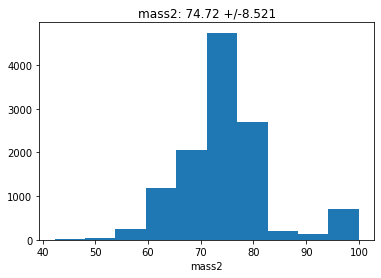

In [13]:
# Results for mass of planet 2
x = 'mass2'

param_flat = chains[:,:,dparam[x]].flatten()
mass2 = np.mean(param_flat)
mass_std = np.std(param_flat)

plt.hist(param_flat)
plt.title(f"{x}: {mass2:.2f} +/-{mass_std:.3f}")
plt.xlabel(x)

### Plotting from arrays

Finally, let's plot some results. 

In [14]:
nauplot = nau.Plots(system, burnin=0.3)

Unlike previous examples we have seen in this set of tutorials, in this example we are not specifying the hdf5_file kwarg in nau.Plots. Instead, we will pass our joined arrays directly to the plotting functions through the -chains- kwarg.

In the following cells, we will make figures using the physical array 'chains_phys' we made above.

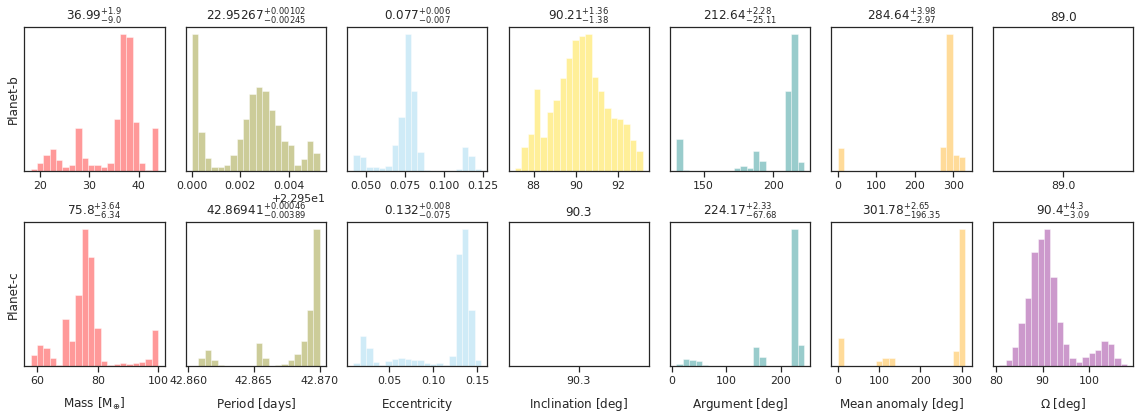

In [15]:
nauplot.hist(chains = chains, # <-- Here, chains is in the physical form.
             titles = True);

Now, a plot of the chains evolution with the mean to guide the eye:

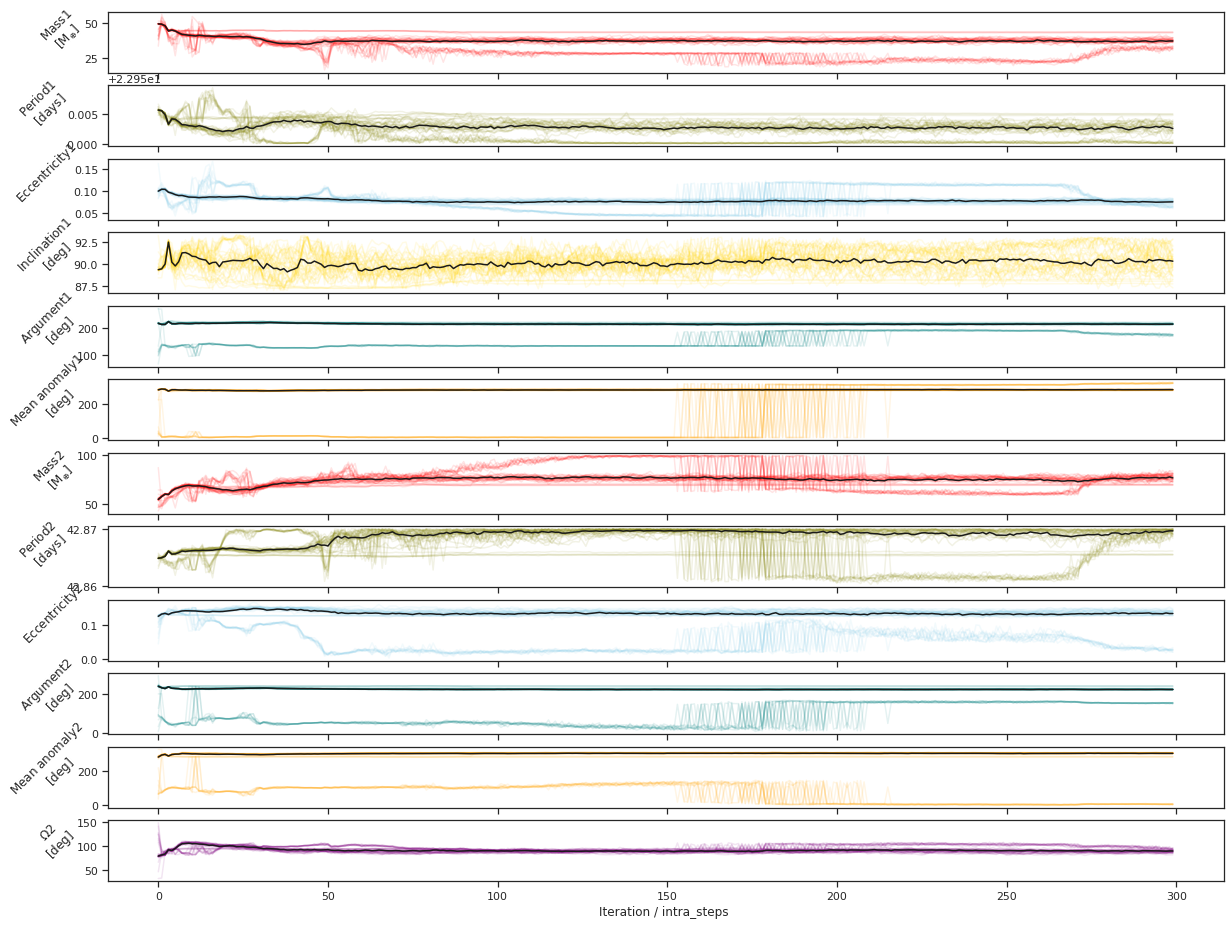

In [16]:
nauplot.trace_plot(chains=chains, plot_means=True);

Now, plot a convergence test:

--> Performing Gelman-Rubin test
--> Performing Geweke test


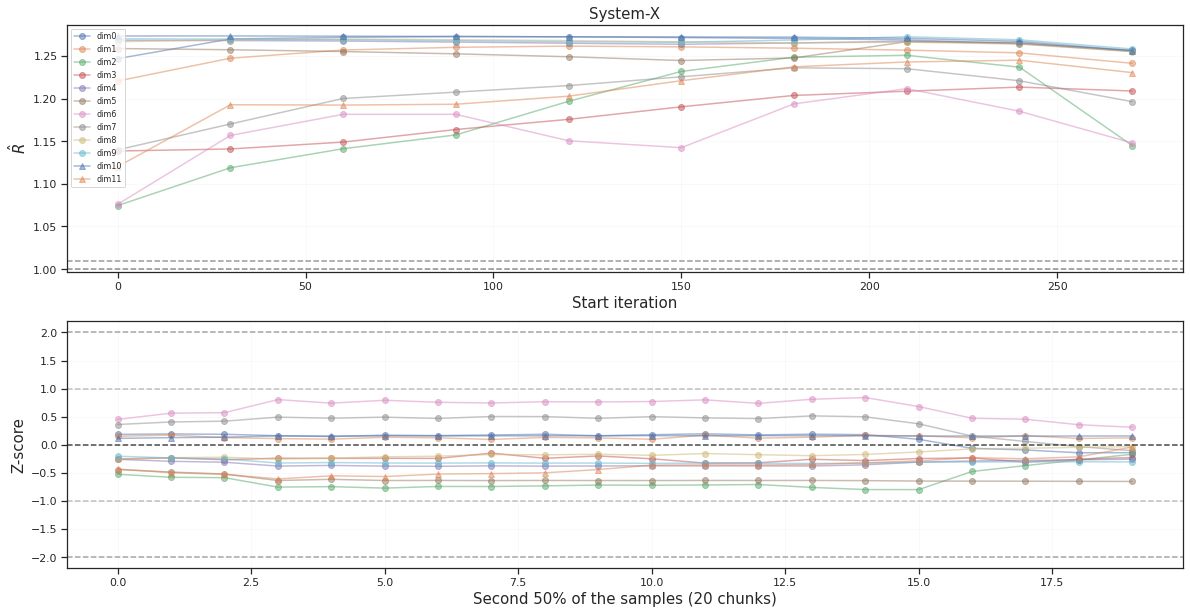

In [22]:
nauplot.convergence(chains=chains);

The convergence is reached when $\hat{R}$ is below 1-1.01, and with Z-score between -2 and 2. Does is it converged in comparison with results from customized_fit example? Since the TTVs inversion problem is based on numerical N-body simulations, then, more computational time would be required in order to the MCMC fully converge. However, these examples illustrate the main usage of the tool.

Finally, let's plot the fits of the last iteration

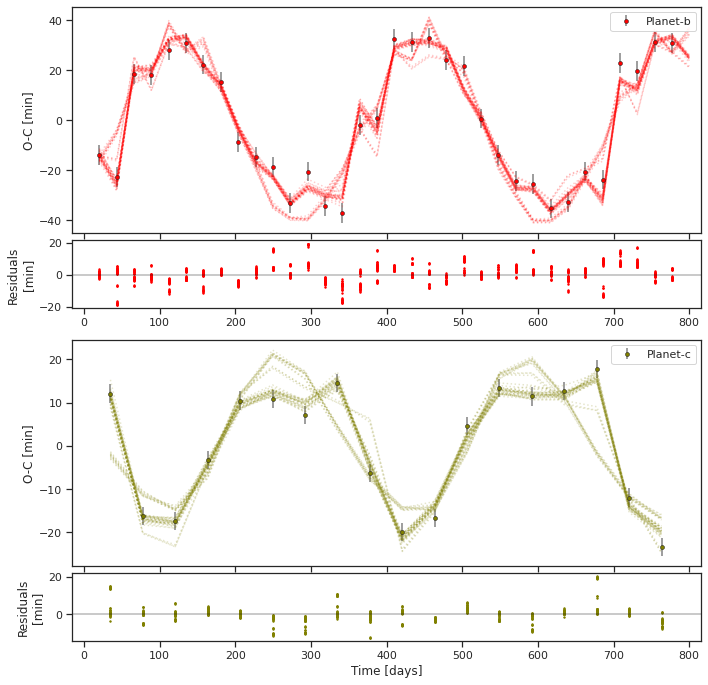

In [20]:
nauplot.TTVs(flat_params=chains[:,-1,:], nsols=50, mode='random', line_kwargs={'alpha':0.2, 'ls':':'});

__________________